In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
import seaborn as sns
import pandas_datareader.data as web
import yfinance as yf
from datetime import datetime

/Users/chongbei/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
ixic = yf.Ticker("TQQQ")

# get all stock info

# get historical market data
ixic = ixic.history(period="3mo")

/Users/chongbei/anaconda3/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [12]:
ixic.tail()

,Open,High,Low,Close,Capital Gains,size
Date,,,,,,
2024-01-29 00:00:00-05:00,55.610001,57.200001,55.340000,57.070000,0.0,1.0
2024-01-30 00:00:00-05:00,56.689999,56.919998,55.599998,55.930000,0.0,1.0
2024-01-31 00:00:00-05:00,54.189999,54.980000,52.580002,52.639999,0.0,2.0
2024-02-01 00:00:00-05:00,53.290001,54.639999,52.910000,54.500000,0.0,1.0
2024-02-02 00:00:00-05:00,55.180000,57.680000,54.790001,57.240002,0.0,2.0


In [6]:
ixic.drop(['Volume','Dividends','Stock Splits'], axis=1,inplace=True)

In [7]:
ixic["size"] = abs(round(ixic["Close"] - ixic["Open"], 0))

In [8]:
ixic.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62 entries, 2023-11-03 00:00:00-04:00 to 2024-02-02 00:00:00-05:00
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           62 non-null     float64
 1   High           62 non-null     float64
 2   Low            62 non-null     float64
 3   Close          62 non-null     float64
 4   Capital Gains  62 non-null     float64
 5   size           62 non-null     float64
dtypes: float64(6)
memory usage: 3.4 KB


In [9]:
ixic.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,62.0,47.285270,5.318211,36.539594,43.436813,47.171456,50.629999,57.259998
High,62.0,48.113490,5.358640,37.813998,44.248250,48.877764,51.449999,57.900002
Low,62.0,46.623260,5.200185,36.469900,42.779697,46.662068,50.082500,56.119999
Close,62.0,47.529525,5.265062,37.415749,43.737990,48.288658,50.772751,57.240002
Capital Gains,62.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
size,62.0,0.741935,0.675945,0.000000,0.000000,1.000000,1.000000,2.000000


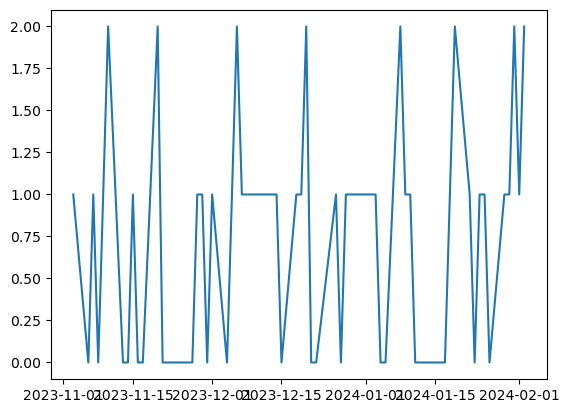

In [10]:
ixic['size'].value_counts()
plt.plot(ixic['size'])